In [1]:
import networkx as nx;
import matplotlib.pyplot as plt;
import pandas as pd;
import math;

## Reading the input networks

We are going to use the edge list reader of Networkx that immediately prepares a network from the edges.

In [2]:
protein_net = nx.read_edgelist('protein.edgelist.txt');
metabolic_net = nx.read_edgelist('metabolic.edgelist.txt');
coli_net = nx.read_edgelist('coliInterNoAutoRegVec.txt',data=False);  # we ignore the 3rd column in the file
yeast_net = nx.read_edgelist('yeastinter_st.txt',data = False);       # we ignore the 3rd column in the file

Let's just peek at one of the networks.

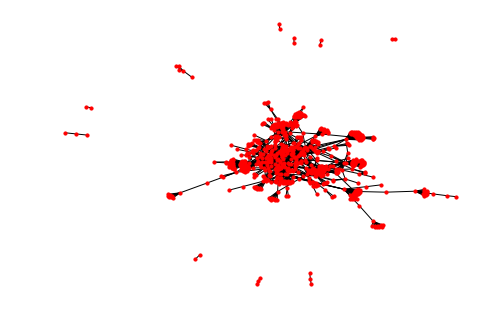

In [3]:
nx.draw(yeast_net,node_size=10)

OK, it is apparent from the layout that it consists of multiple separate components. Since we are interested in the average shortest path length, we are going to concentrate on the largest connected component.

In the next cell we extract the largest connected component from each network using Networkx.

In [4]:
protein_lcc = protein_net.subgraph(max(nx.connected_components(protein_net), key = len));
metabolic_lcc = metabolic_net.subgraph(max(nx.connected_components(metabolic_net), key = len));
coli_lcc = coli_net.subgraph(max(nx.connected_components(coli_net), key = len));
yeast_lcc = yeast_net.subgraph(max(nx.connected_components(yeast_net), key = len));

Let's replot the result for the same network.

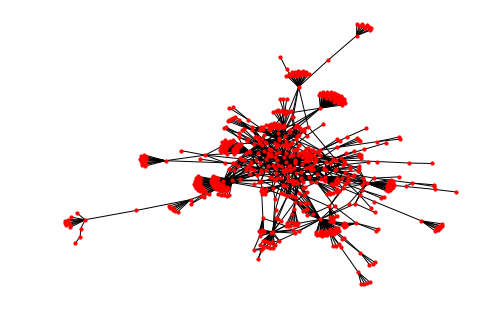

In [5]:
nx.draw(yeast_lcc, node_size=10)

### Regular graph as a comparison

We are going to use 2 simple regular graphs as a sort of comparison:
 - 1d chains,
 - and square lattices of the same size as the input networks.
 
Luckily, these sort of networks are easy to generate using Networkx.

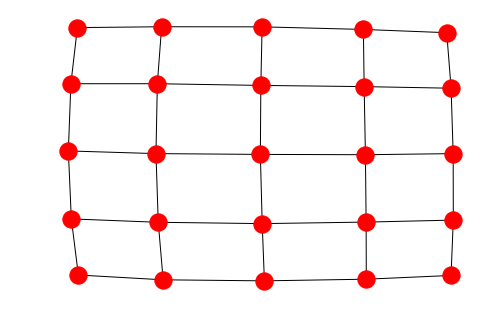

In [5]:
small_square_lattice = nx.grid_2d_graph(5,5);
nx.draw(small_square_lattice)

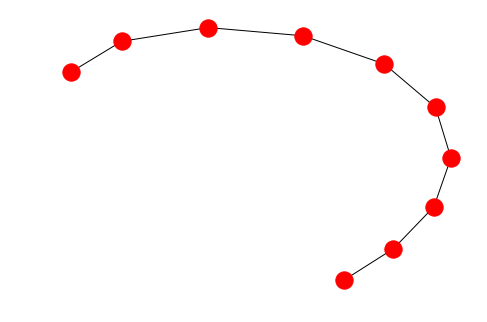

In [6]:
short_chain = nx.grid_2d_graph(1,10);
nx.draw(short_chain)

## Measuring the average shortest path length

We use again the built in functions of Networkx. For each network we also prepare a chain and a square lattice with (roughly) the same number of nodes.

In [7]:
networks_list = [coli_lcc,yeast_lcc,metabolic_lcc,protein_lcc];

In [8]:
net_size_list, av_shortest_path = [],[];  # we 'record' the network size and av. distance in these lists.
lattice_av_sp, chain_av_sp = [],[];       # here goes the distance in the lattices and in the chains.
net_size_list.clear();
av_shortest_path.clear();
lattice_av_sp.clear();
chain_av_sp.clear();

for net in networks_list:
    net_size_list.append(net.number_of_nodes());
    av_shortest_path_length = nx.average_shortest_path_length(net);
    av_shortest_path.append(av_shortest_path_length);
    
    chain_graph = nx.grid_2d_graph(1,net.number_of_nodes());
    chain_av_sp_length = nx.average_shortest_path_length(chain_graph);
    chain_av_sp.append(chain_av_sp_length);
    
    lattice_size = int(math.sqrt(net.number_of_nodes()));
    lattice_graph = nx.grid_2d_graph(lattice_size,lattice_size);
    lattice_av_sp_length = nx.average_shortest_path_length(lattice_graph);
    lattice_av_sp.append(lattice_av_sp_length);
    
    print('N=',net.number_of_nodes(),', <l>=',av_shortest_path_length,', chain:',chain_av_sp_length,' lattice:',lattice_av_sp_length)    

N= 329 , <l>= 4.84133367929424 , chain: 110.0  lattice: 12.0
N= 662 , <l>= 5.199546599265966 , chain: 221.0  lattice: 16.666666666666668
N= 1039 , <l>= 2.477100220495103 , chain: 346.6666666666667  lattice: 21.333333333333332
N= 1647 , <l>= 5.611747416599716 , chain: 549.3333333333334  lattice: 26.666666666666668


### Plotting the results

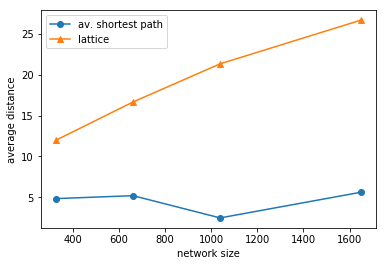

In [10]:
plt.clf();
plt.plot(net_size_list,av_shortest_path,'-o',label='av. shortest path');
#plt.plot(net_size_list,chain_av_sp,'-s',label = 'chain');
plt.plot(net_size_list,lattice_av_sp,'-^',label= 'lattice');
plt.xlabel('network size');
plt.ylabel('average distance');
plt.legend();
plt.show();

## Extending the data with further networks

It would be nice to see the behaviour for larger systems as well. However, the calculation of the average shortest path length can take longer times, so for demonstration puproses here we just take results from the book by Albert-László Barabasi.

In [12]:
further_nets = {'internet': (192294,6.98), 'WWW': (325729,11.27), 'power-grid': (4941,18.99), 'phone': (36595,11.72), 'citation': (449673,11.21)};

We sort these networks to be added according to their size:

In [13]:
size_sorted_nets = sorted(further_nets.items(), key = lambda x: x[1][0]);
for i in range(0,len(size_sorted_nets)):
    print(size_sorted_nets[i])

('power-grid', (4941, 18.99))
('phone', (36595, 11.72))
('internet', (192294, 6.98))
('WWW', (325729, 11.27))
('citation', (449673, 11.21))


And then we can append them to the previous results. For chains and lattices we use that the average distance in a chain is roughly $\frac{N}{3}$, whereas in a square lattice it is $\frac{2}{3}\cdot\sqrt{N}$.

In [14]:
for i in range(0,len(size_sorted_nets)):
    network_size, net_av_shpl = size_sorted_nets[i][1][0], size_sorted_nets[i][1][1];
    net_size_list.append(network_size);
    av_shortest_path.append(net_av_shpl);

    chain_av_dist = network_size*0.333;
    chain_av_sp.append(chain_av_dist);
    
    lattice_av_dist = math.sqrt(network_size)*0.667;
    lattice_av_sp.append(lattice_av_dist);    

We can now plot all the results together.

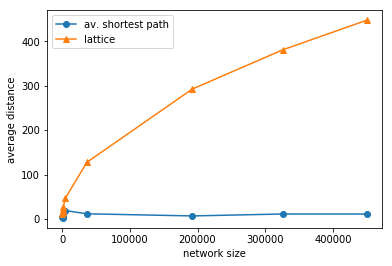

In [16]:
plt.clf();
plt.plot(net_size_list,av_shortest_path,'-o',label='av. shortest path');
#plt.plot(net_size_list,chain_av_sp,'-s',label = 'chain');
plt.plot(net_size_list,lattice_av_sp,'-^',label= 'lattice');
plt.xlabel('network size');
plt.ylabel('average distance');
plt.legend();
plt.show();

Since the results on both the x and the y axis span accorss multiple orders of magnitude, it is worth to switch to a log-log scale.

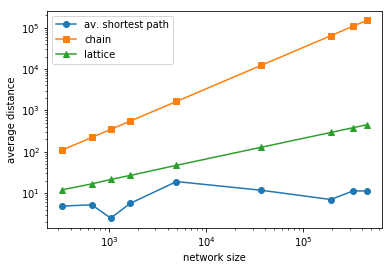

In [17]:
plt.clf();
plt.loglog(net_size_list,av_shortest_path,'-o',label='av. shortest path');
plt.loglog(net_size_list,chain_av_sp,'-s',label = 'chain');
plt.loglog(net_size_list,lattice_av_sp,'-^',label= 'lattice');
plt.xlabel('network size');
plt.ylabel('average distance');
plt.legend();
plt.show();